In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#reading json file in python
with open('transaction-data-adhoc-analysis.json','r') as f:
    data = json.load(f)

In [4]:
#json file to dataframe and original data frame
listdf=pd.DataFrame(data)
listdf

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [5]:
#splitting per item in transaction_items into different rows
listdf["transaction_items"]=listdf["transaction_items"].str.split(";")
listdf = listdf.explode("transaction_items")

#splitting the number in transaction items into another row
listdf[["transaction_items","transaction_amount"]]=listdf["transaction_items"].str.split("(",expand = True)

#removing unnecessary characters
listdf["transaction_amount"] = listdf["transaction_amount"].str.replace("x","")
listdf["transaction_amount"] = listdf["transaction_amount"].str.replace(")","")

#turning transaction amount into an integer
listdf["transaction_amount"] = listdf["transaction_amount"].astype(int)

#splitting the date into year, month, day
listdf[["year","month","day"]]=listdf["transaction_date"].str.split("/", expand = True)
listdf[["item_type","transaction_items"]]=listdf["transaction_items"].str.split(",",n=1,expand = True)

#removing unnecessary characters
listdf["transaction_items"] = listdf["transaction_items"].str.replace(",","")
listdf.head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27580\146301205.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listdf["transaction_amount"] = listdf["transaction_amount"].str.replace(")","")


,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_amount,year,month,day,item_type
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,Beef Chicharon,5196,2022/01/12,4,2022,01,12,Exotic Extras
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Beef Chicharon,12056,2022/01/12,3,2022,01,12,Exotic Extras
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Nutrional Milk,12056,2022/01/12,4,2022,01,12,HealthyKid 3+
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Orange Beans,12056,2022/01/12,1,2022,01,12,Candy City
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Gummy Vitamins,5500,2022/01/08,3,2022,01,08,HealthyKid 3+
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Yummy Vegetables,5500,2022/01/08,2,2022,01,08,HealthyKid 3+
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Yummy Vegetables,500,2022/01/10,1,2022,01,10,HealthyKid 3+
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,Orange Beans,2697,2022/01/24,3,2022,01,24,Candy City
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,Gummy Worms,2697,2022/01/24,4,2022,01,24,Candy City
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,Gummy Vitamins,2697,2022/01/24,1,2022,01,24,HealthyKid 3+


In [6]:
#making a new table to find the count of each item sold per month
new_table1=listdf.groupby(['transaction_items','month'])['transaction_amount'].sum()
table1df=pd.DataFrame(new_table1)

#arranging the table properly
pivot_table1 = table1df.pivot_table(values='transaction_amount', index='transaction_items', columns='month', aggfunc='first')
table1df=pd.DataFrame(pivot_table1)

#renaming columns
table1df.columns = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun']
table1df

,Jan,Feb,Mar,Apr,May,Jun
transaction_items,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


In [7]:
#similar procedure but for item type
new_table2=listdf.groupby(['item_type','month'])['transaction_amount'].sum()
table2df=pd.DataFrame(new_table2)
pivot_table2 = table2df.pivot_table(values='transaction_amount', index='item_type', columns='month', aggfunc='first')
table2df=pd.DataFrame(pivot_table2)
table2df.columns = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun']
table2df

,Jan,Feb,Mar,Apr,May,Jun
item_type,,,,,,
Candy City,19333,20033,19597,19957,19765,20040
Exotic Extras,19341,19950,19783,19811,19801,20006
HealthyKid 3+,29367,29927,29917,29489,29564,29469


In [8]:
#array of products available
all_products = listdf['transaction_items'].unique()
all_products

array(['Beef Chicharon', 'Nutrional Milk', 'Orange Beans',
       'Gummy Vitamins', 'Yummy Vegetables', 'Gummy Worms',
       'Kimchi and Seaweed'], dtype=object)

In [9]:
#filtering each item
filter_item1 = listdf.loc[:,'transaction_items']==all_products[0]
filter_item2 =listdf.loc[:,'transaction_items']==all_products[1]
filter_item3= listdf.loc[:,'transaction_items']==all_products[2]
filter_item4 = listdf.loc[:,'transaction_items']==all_products[3]
filter_item5 = listdf.loc[:,'transaction_items']==all_products[4]
filter_item6 = listdf.loc[:,'transaction_items']==all_products[5]
filter_item7 = listdf.loc[:,'transaction_items']==all_products[6]

#taking minimum price of each item
item_price1 = listdf.loc[filter_item1,'transaction_value'].min()
item_price2 = listdf.loc[filter_item2,'transaction_value'].min()
item_price3 = listdf.loc[filter_item3,'transaction_value'].min()
item_price4 = listdf.loc[filter_item4,'transaction_value'].min()
item_price5 = listdf.loc[filter_item5,'transaction_value'].min()
item_price6 = listdf.loc[filter_item6,'transaction_value'].min()
item_price7 = listdf.loc[filter_item7,'transaction_value'].min()

In [10]:
#all prices array
item_price = np.array([item_price1,item_price2,item_price3,item_price4,item_price5,item_price6,item_price7])
individual_price = item_price.reshape(7,1)
print(individual_price)

[[1299]
 [1990]
 [ 199]
 [1500]
 [ 500]
 [ 150]
 [ 799]]


In [11]:
#fixing the index of the transaction items
table1df = table1df.reindex(all_products)
table1df

,Jan,Feb,Mar,Apr,May,Jun
transaction_items,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Yummy Vegetables,9959,10256,9896,9861,9735,9722
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104


In [12]:
#multiplying the price array to the total transactions per month array
item_per_month=np.array(table1df)
total_sale_val = item_per_month * individual_price

In [13]:
#making the DataFrame for total sale value per month
total_sale_valdf=pd.DataFrame(total_sale_val)
total_sale_valdf.columns = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun']
total_sale_valdf.index = [all_products]
total_sale_valdf

,Jan,Feb,Mar,Apr,May,Jun
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096


In [14]:
#returning to the initial unedited dataframe but only splitting the transaction_date into year, month, day
newlistdf=pd.DataFrame(data)
newlistdf[["year","month","day"]]=newlistdf["transaction_date"].str.split("/", expand = True)
newlistdf["month"] = newlistdf["month"].astype(int)
newlistdf

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,year,month,day
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,2022,1,12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,2022,1,12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,2022,1,08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,2022,1,10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,2022,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05,2022,6,05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12,2022,6,12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15,2022,6,15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09,2022,6,09


In [15]:
#total people who transacted that month
total_transactions = newlistdf.groupby('month')['name'].count()
namedf = pd.DataFrame(total_transactions)
namedf

,name
month,
1,13688
2,13972
3,13902
4,13779
5,13864
6,13831


In [16]:
#fixing the table
namedf = namedf.transpose()
namedf

month,1,2,3,4,5,6
name,13688,13972,13902,13779,13864,13831


In [17]:
#finding the individual name and placing them ina dataframe
individual_name = newlistdf.groupby(['name','month'])['transaction_items'].count()
individual_namedf = pd.DataFrame(individual_name)
individual_namedf["transaction_items"] = individual_namedf["transaction_items"].astype(int)
individual_namedf

transaction_items
name          month                   
Aaron Beasley 4                      2
              5                      2
              6                      1
Aaron Brewer  1                      1
              2                      1
...                                ...
Zachary York  2                      2
              3                      1
              4                      3
              5                      3
              6                      1

[39617 rows x 1 columns]

In [18]:
#make a pivot table where the columns are the months and the rows are the number of times the name transacted that month
individual_name_monthly = individual_namedf.pivot_table(values='transaction_items', index='name', columns='month', aggfunc='first')
individual_name_monthly

month,1,2,3,4,5,6
name,,,,,,
Aaron Beasley,NaN,NaN,NaN,2.0,2.0,1.0
Aaron Brewer,1.0,1.0,1.0,2.0,NaN,2.0
Aaron Brown,NaN,NaN,3.0,2.0,1.0,1.0
Aaron Coffey,1.0,2.0,2.0,2.0,2.0,NaN
Aaron Davis,1.0,1.0,NaN,3.0,3.0,2.0
...,...,...,...,...,...,...
Zachary Valentine,1.0,1.0,1.0,1.0,2.0,3.0
Zachary Ware,1.0,2.0,3.0,1.0,3.0,2.0
Zachary Williams,4.0,4.0,4.0,4.0,NaN,NaN


In [19]:
#fixing the columns and using the not null function to treat those who didn't transact in the specific month as false
individual_name_monthly.columns = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun']
individual_name_monthly = individual_name_monthly.notnull()
individual_name_monthly

,Jan,Feb,Mar,Apr,May,Jun
name,,,,,,
Aaron Beasley,False,False,False,True,True,True
Aaron Brewer,True,True,True,True,False,True
Aaron Brown,False,False,True,True,True,True
Aaron Coffey,True,True,True,True,True,False
Aaron Davis,True,True,False,True,True,True
...,...,...,...,...,...,...
Zachary Valentine,True,True,True,True,True,True
Zachary Ware,True,True,True,True,True,True
Zachary Williams,True,True,True,True,False,False


In [20]:
#repeaters
Repeaters_Feb = sum((individual_name_monthly.Jan == True) & (individual_name_monthly.Feb == True))
Repeaters_Mar = sum((individual_name_monthly.Feb == True) & (individual_name_monthly.Mar == True))
Repeaters_Apr = sum((individual_name_monthly.Mar == True) & (individual_name_monthly.Apr == True))
Repeaters_May = sum((individual_name_monthly.Apr == True) & (individual_name_monthly.May == True))
Repeaters_Jun = sum((individual_name_monthly.May == True) & (individual_name_monthly.Jun == True))

In [21]:
#adding a new row for the repeaters
namedf.loc[len(namedf.index)] = [0, Repeaters_Feb, Repeaters_Mar,Repeaters_Apr,Repeaters_May,Repeaters_Jun]
namedf

month,1,2,3,4,5,6
name,13688,13972,13902,13779,13864,13831
1,0,5172,5216,5154,5110,5193


In [22]:
#renaming repeaters
namedf = namedf.rename(index={1: 'Repeaters'})
namedf

month,1,2,3,4,5,6
name,13688,13972,13902,13779,13864,13831
Repeaters,0,5172,5216,5154,5110,5193


namedf= pd.DataFrame(names)

In [23]:
#inactive
Inactive_Feb = sum((individual_name_monthly.Jan == True) & (individual_name_monthly.Feb == False))
Inactive_Mar = sum((individual_name_monthly.Mar == False) & ((individual_name_monthly.Jan == True) |(individual_name_monthly.Feb == True)))
Inactive_Apr = sum((individual_name_monthly.Apr == False) & ((individual_name_monthly.Jan == True) |(individual_name_monthly.Feb == True)|(individual_name_monthly.Mar == True)))
Inactive_May = sum((individual_name_monthly.May == False) & ((individual_name_monthly.Jan == True) |(individual_name_monthly.Feb == True)|(individual_name_monthly.Mar == True)|(individual_name_monthly.Apr == True)))
Inactive_Jun = sum((individual_name_monthly.Jun == False) & ((individual_name_monthly.Jan == True) |(individual_name_monthly.Feb == True)|(individual_name_monthly.Mar == True)|(individual_name_monthly.Apr == True)|(individual_name_monthly.May == True)))

In [24]:
#adding new row for inactive
namedf.loc[len(namedf.index)] = [0, Inactive_Feb, Inactive_Mar,Inactive_Apr,Inactive_May,Inactive_Jun]
namedf

month,1,2,3,4,5,6
name,13688,13972,13902,13779,13864,13831
Repeaters,0,5172,5216,5154,5110,5193
2,0,1416,1747,1909,1917,1835


In [25]:
#renaming inactive
namedf = namedf.rename(index={2: 'Inactive'})
namedf

month,1,2,3,4,5,6
name,13688,13972,13902,13779,13864,13831
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835


In [26]:
#engaged the first sum is similar to repeaters. The second sum are the new customers
Engaged_Jan = sum((individual_name_monthly.Jan == True))
Engaged_Feb = sum((individual_name_monthly.Feb == True))
Engaged_Mar = sum((individual_name_monthly.Mar == True)&(individual_name_monthly.Feb == True),sum((individual_name_monthly.Mar == True)&(individual_name_monthly.Feb == False)&(individual_name_monthly.Jan == False)))
Engaged_Apr = sum((individual_name_monthly.Apr == True)&(individual_name_monthly.Mar == True),sum((individual_name_monthly.Apr == True)&(individual_name_monthly.Mar == False)&(individual_name_monthly.Feb == False)&(individual_name_monthly.Jan == False)))
Engaged_May = sum((individual_name_monthly.May == True)&(individual_name_monthly.Apr == True),sum((individual_name_monthly.May == True)&(individual_name_monthly.Apr == False)&(individual_name_monthly.Mar == False)&(individual_name_monthly.Feb == False)&(individual_name_monthly.Jan == False)))
Engaged_Jun = sum((individual_name_monthly.Jun == True)&(individual_name_monthly.May == True),sum((individual_name_monthly.Jun == True)&(individual_name_monthly.May == False)&(individual_name_monthly.Apr == False)&(individual_name_monthly.Mar == False)&(individual_name_monthly.Feb == False)&(individual_name_monthly.Jan == False)))

In [27]:
#adding new row for engaged
namedf.loc[len(namedf.index)] = [Engaged_Jan, Engaged_Feb, Engaged_Mar,Engaged_Apr,Engaged_May,Engaged_Jun]
namedf
#renaming engaged
namedf = namedf.rename(index={3: 'Engaged'})
namedf

month,1,2,3,4,5,6
name,13688,13972,13902,13779,13864,13831
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,6631,5538,5250,5130,5195


In [28]:
#renaming name and columns
namedf = namedf.rename(index={'name': 'Total Transactions per Month'})
namedf.columns = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun']
namedf

,Jan,Feb,Mar,Apr,May,Jun
Total Transactions per Month,13688,13972,13902,13779,13864,13831
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,6631,5538,5250,5130,5195


In [29]:
#Adding loyal, customers who engaged since day 1
Loya1_Jan = sum((individual_name_monthly.Jan == True))
Loyal_Feb = sum((individual_name_monthly.Feb == True)&(individual_name_monthly.Jan == True))
Loyal_Mar = sum((individual_name_monthly.Mar == True)&(individual_name_monthly.Feb == True)&(individual_name_monthly.Jan == True))
Loyal_Apr = sum((individual_name_monthly.Apr == True)&(individual_name_monthly.Mar == True)&(individual_name_monthly.Feb == True)&(individual_name_monthly.Jan == True))
Loyal_May = sum((individual_name_monthly.May == True)&(individual_name_monthly.Apr == True)&(individual_name_monthly.Mar == True)&(individual_name_monthly.Feb == True)&(individual_name_monthly.Jan == True))
Loyal_Jun = sum((individual_name_monthly.Jun == True)&(individual_name_monthly.May == True)&(individual_name_monthly.Apr == True)&(individual_name_monthly.Mar == True)&(individual_name_monthly.Feb == True)&(individual_name_monthly.Jan == True))


In [30]:
#adding new row for loyal
namedf.loc[len(namedf.index)] = [Loya1_Jan, Loyal_Feb, Loyal_Mar,Loyal_Apr,Loyal_May,Loyal_Jun]
namedf
#renaming loyal
namedf = namedf.rename(index={4: 'Loyal'})
namedf

,Jan,Feb,Mar,Apr,May,Jun
Total Transactions per Month,13688,13972,13902,13779,13864,13831
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,6631,5538,5250,5130,5195
Loyal,6588,5172,4126,3289,2667,2190


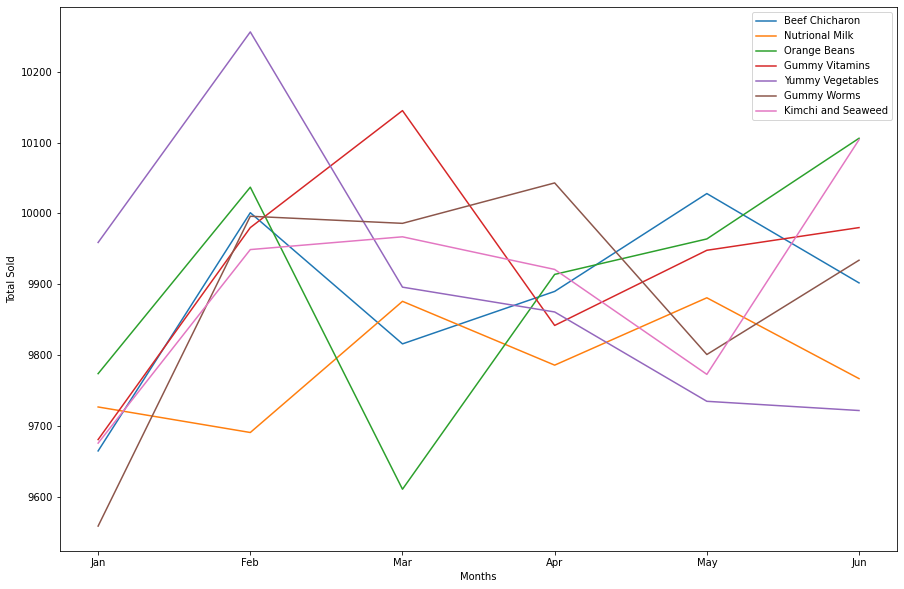

In [31]:
#First requirement table graph
transpose_table1 = table1df.transpose()
graph1 = transpose_table1.plot(figsize=(15,10))
graph1.set_xlabel('Months')
graph1.set_ylabel('Total Sold')
plt.legend(fontsize = 10,loc = 'upper right')
plt.show()

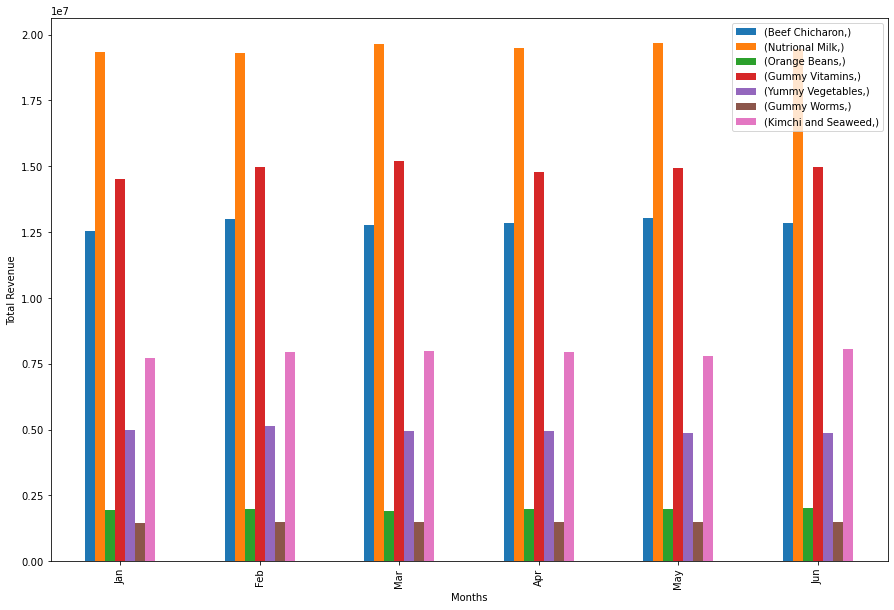

In [32]:
#Second requirement table graph
transpose_total_sale_valdf = total_sale_valdf.transpose()
graph2 = transpose_total_sale_valdf.plot.bar(figsize=(15,10))
graph2.set_xlabel('Months')
graph2.set_ylabel('Total Revenue')
plt.legend(fontsize = 10,loc = 'upper right')

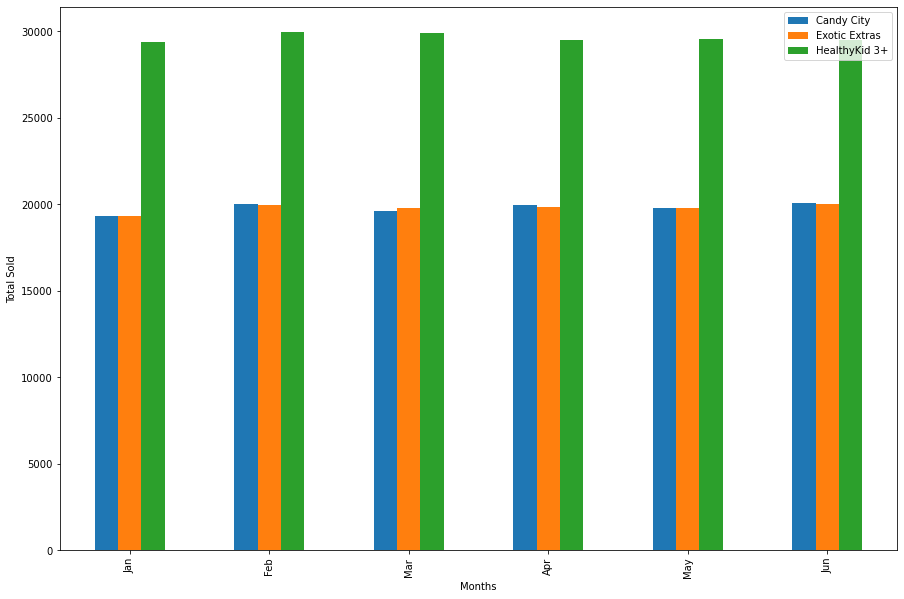

In [33]:
# order type table graph
transpose_table2 = table2df.transpose()
graph3 = transpose_table2.plot.bar(figsize=(15,10))
graph3.set_xlabel('Months')
graph3.set_ylabel('Total Sold')
plt.legend(fontsize = 10,loc = 'upper right')

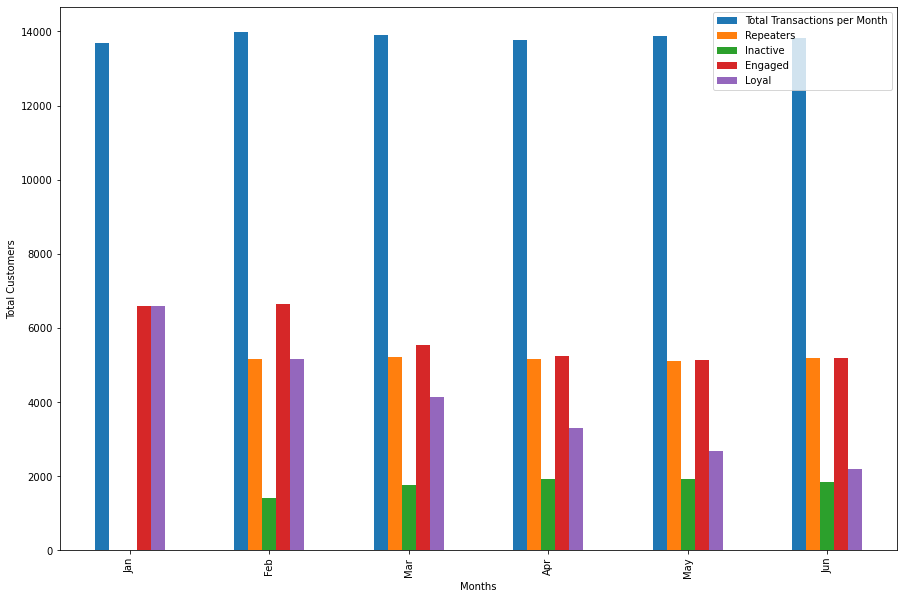

In [34]:
#Third requirement table graph
transpose_namedf = namedf.transpose()
graph4 = transpose_namedf.plot.bar(figsize=(15,10))
graph4.set_xlabel('Months')
graph4.set_ylabel('Total Customers')
plt.legend(fontsize = 10,loc = 'upper right')